In [4]:
## Exercise with the wine dataset from sklearn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


In [19]:
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [30]:
#load the data
wine = load_wine()
wine_table = pd.DataFrame(wine['data'])
wine_table.columns = wine['feature_names']


In [31]:
# Create a target column with the dataset target
wine_table['target'] = wine['target']
wine_table['od_of_diluted_wines'] = wine_table['od280/od315_of_diluted_wines']
wine_table = wine_table.drop('od280/od315_of_diluted_wines', axis=1)
wine_table

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,proline,target,od_of_diluted_wines
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,1065.0,0,3.92
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,1050.0,0,3.40
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,1185.0,0,3.17
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,1480.0,0,3.45
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,735.0,0,2.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,740.0,2,1.74
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,750.0,2,1.56
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,835.0,2,1.56
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,840.0,2,1.62


In [32]:
print(wine['target_names'])

['class_0' 'class_1' 'class_2']


In [33]:
# print the first 5 rows of the dataset
wine_table.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,proline,target,od_of_diluted_wines
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,1065.0,0,3.92
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,1050.0,0,3.40
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,1185.0,0,3.17
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,1480.0,0,3.45
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,735.0,0,2.93


In [31]:
#make sure that the columns have the correct label

In [34]:
wine_table.shape

(178, 14)

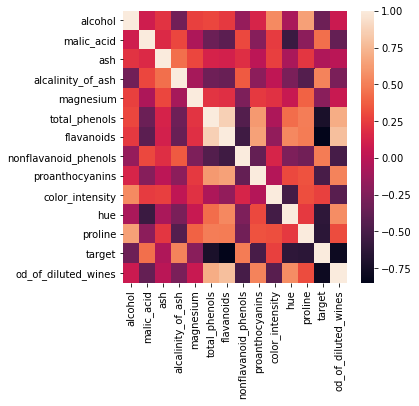

In [35]:
#evaluate features for correlations
plt.figure(figsize=(5,5))
sns.heatmap(wine_table.corr())
plt.show()

In [36]:
#choose features from heat plot
features = wine_table[['alcalinity_of_ash', 'total_phenols', 'flavanoids', 'hue', 'proline', 'od_of_diluted_wines']]

In [37]:
#set X to features and y to target
X = features
y = wine_table['target']

In [75]:
#split train and test data with 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=0) 

In [76]:
scaler = StandardScaler()
for c in X_train.columns:
    X_train.loc[:,c] = scaler.fit_transform(np.array(X_train.loc[:,c]).reshape(-1, 1))
    X_test.loc[:,c] = scaler.fit_transform(np.array(X_test.loc[:,c]).reshape(-1, 1))

/home/roy/.conda/envs/MachineLearning/lib/python3.8/site-packages/pandas/core/indexing.py:1783: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/home/roy/.conda/envs/MachineLearning/lib/python3.8/site-packages/pandas/core/indexing.py:1783: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/home/roy/.conda/envs/MachineLearning/lib/python3.8/site-packages/pandas/core/indexing.py:1783: SettingWithCopyWarning: 
A value

In [77]:
X_train

,alcalinity_of_ash,total_phenols,flavanoids,hue,proline,od_of_diluted_wines
84,-0.491365,-0.155583,0.179657,-0.749108,-0.712474,0.666749
11,-0.842576,-0.155583,0.398383,0.996524,1.632453,0.295069
168,1.411026,-1.213825,-1.182406,-0.978796,-0.002825,-1.163061
138,-0.052352,-1.099861,-1.540320,-0.657232,-0.527348,-1.134470
86,0.913477,-0.839370,-0.337330,1.731527,-0.789609,-0.505473
...,...,...,...,...,...,...
48,-0.257225,0.739852,0.885544,0.537147,0.953659,0.195001
125,0.386661,0.495642,0.617108,-0.427544,-1.150605,0.952657
137,1.557364,-0.823090,-1.421015,-0.611295,-0.727901,-1.320310
158,1.557364,0.821255,-0.715129,-1.759736,-0.280513,-0.934334


In [78]:
#Now, we classify with a Random forest
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [79]:
print('Training Score: {}'.format(rfc.score(X_train, y_train)))
print('Testing Score: {}'.format(rfc.score(X_test, y_test)))

Training Score: 1.0
Testing Score: 0.9722222222222222


## Pretty good, huh? 
- What if we want to use another [classifier from sklearn](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)?

In [89]:
########################################################
########################################################
#K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [90]:
print('Training Score: {}'.format(knn.score(X_train, y_train)))
print('Testing Score: {}'.format(knn.score(X_test, y_test)))

Training Score: 0.9436619718309859
Testing Score: 0.9444444444444444


In [92]:
########################################################
########################################################
#Support vector machines
svc = SVC(random_state=0)
svc.fit(X_train, y_train)

SVC(random_state=0)

In [94]:
print('Training Score: {}'.format(svc.score(X_train, y_train)))
print('Testing Score: {}'.format(svc.score(X_test, y_test)))

Training Score: 0.971830985915493
Testing Score: 0.9722222222222222


In [95]:
########################################################
########################################################
#Naive Bayes Guassian
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [97]:
print('Training Score: {}'.format(gnb.score(X_train, y_train)))
print('Testing Score: {}'.format(gnb.score(X_test, y_test)))

Training Score: 0.9507042253521126
Testing Score: 0.9444444444444444
